# 机器学习实战-决策树

# 1.首先创建一个数据集

In [1]:
from math import log
import operator
#import treePlotter
#创建数据集

def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfing ', 'flippers']
    #change to discrete values
    return dataSet, labels

# 2.计算香农熵

这段代码主要是用于计算数据的每个特征信息熵，信息熵用于描述数据的混乱程度，信息熵越大说明数据包含的信息越多，也就是数据的波动越大。

而ID3算法采用的是信息增益作为计算指标来评价每个特征所包含的信息的多少，而信息增益方法对可取数值较多的特征有所偏好，即本身可取数值较多的特征本身就包含更多的信息，为了减少这种偏好，又有C4.5和CART树，C4.5用信息增益率来衡量数据特征，从而摒除了这种偏好；CART树使用了“基尼指数”来衡量特征，基尼指数越小说明他的数据纯度就越高，选取特征时选取划分后使基尼指数最小的特征作为划分标准，即选取特征后使数据集变得更加纯，从而减少了数据集本身的混乱程度，本身决策树做的事情就是这个。

In [2]:
#这段代码主要用于计算数据的每个特征信息熵，信息熵用于描述数据的混乱程度，信息熵越大说明数据包含的信息越多，也就是数据的波动越大
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for fectVec in dataSet:
        currentLabel = fectVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for value in labelCounts.values():
        prob = float(value )/ numEntries
        shannonEnt -= prob*log(prob, 2)
    return shannonEnt  

In [29]:
myDat, labels =createDataSet()
calcShannonEnt(myDat)

0.9709505944546686

In [3]:
myDat, labels = createDataSet()
print(myDat,'\n',labels)
calcShannonEnt(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] 
 ['no surfing ', 'flippers']


0.9709505944546686

In [20]:
myDat, labels = createDataSet()
print(myDat,'\n',labels)

calcShannonEnt(myDat)
print(calcShannonEnt(myDat))
'''
numEntries 5
currentLabel yes
labelCounts[currentLabel] 0
labelCounts[currentLabel] 1
labelCounts {'yes': 1}
currentLabel yes
labelCounts[currentLabel] 2
labelCounts {'yes': 2}
currentLabel no
labelCounts[currentLabel] 0
labelCounts[currentLabel] 1
labelCounts {'yes': 2, 'no': 1}
currentLabel no
labelCounts[currentLabel] 2
labelCounts {'yes': 2, 'no': 2}
currentLabel no
labelCounts[currentLabel] 3
labelCounts {'yes': 2, 'no': 3}
0.9709505944546686
'''

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] 
 ['no surfing ', 'flippers']
0.9709505944546686


"\nnumEntries 5\ncurrentLabel yes\nlabelCounts[currentLabel] 0\nlabelCounts[currentLabel] 1\nlabelCounts {'yes': 1}\ncurrentLabel yes\nlabelCounts[currentLabel] 2\nlabelCounts {'yes': 2}\ncurrentLabel no\nlabelCounts[currentLabel] 0\nlabelCounts[currentLabel] 1\nlabelCounts {'yes': 2, 'no': 1}\ncurrentLabel no\nlabelCounts[currentLabel] 2\nlabelCounts {'yes': 2, 'no': 2}\ncurrentLabel no\nlabelCounts[currentLabel] 3\nlabelCounts {'yes': 2, 'no': 3}\n0.9709505944546686\n"

In [21]:
myDat[0][-1] ='maybe'
print(myDat, labels)
print('Ent changed:', calcShannonEnt(myDat))
#可以看出，在myDat[0][-1]更改之后，熵变大了。

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] ['no surfing ', 'flippers']
Ent changed: 1.3709505944546687


# 3.分离数据

In [3]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [13]:
myDat, label = createDataSet()
splitDataSet(myDat, 1, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [41]:
myDat, label = createDataSet()
splitDataSet(myDat, 1, 1)
"""
1reducedFeatVec [1]
2reducedFeatVec [1, 'yes']
3retDataSet [[1, 'yes']]
1reducedFeatVec [1]
2reducedFeatVec [1, 'yes']
3retDataSet [[1, 'yes'], [1, 'yes']]
1reducedFeatVec [0]
2reducedFeatVec [0, 'no']
3retDataSet [[1, 'yes'], [1, 'yes'], [0, 'no']]
1reducedFeatVec [0]
2reducedFeatVec [0, 'no']
3retDataSet [[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]
以axis = 1为基准即第二列，删除了value ！= 1的数据，并重新组合。
"""

1reducedFeatVec [1]
2reducedFeatVec [1, 'yes']
3retDataSet [[1, 'yes']]
1reducedFeatVec [1]
2reducedFeatVec [1, 'yes']
3retDataSet [[1, 'yes'], [1, 'yes']]
1reducedFeatVec [0]
2reducedFeatVec [0, 'no']
3retDataSet [[1, 'yes'], [1, 'yes'], [0, 'no']]
1reducedFeatVec [0]
2reducedFeatVec [0, 'no']
3retDataSet [[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]


[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [123]:
kk=['1','2','3']
bb=['4','5','6'] 
kk.append(bb)
print('kk:',kk)

aa=['1','2','3']
bb=['4','5','6'] 
aa.extend(bb) 
print('aa:',aa)

kk: ['1', '2', '3', ['4', '5', '6']]
aa: ['1', '2', '3', '4', '5', '6']


# 4.选择最优特征分离：

一般Python for语句前不加语句，但我在机器学习实战中看到了这两条语句：

featList = [example[i] for example in dataSet]

classList = [example[-1] for example in dataSet]

多方研究和询问，得到如下解释：

语句featList = [example[i] for example in dataSet]作用为： 
将dataSet中的数据按行依次放入example中，然后取得example中的example[i]元素，放入列表featList中

语句classList = [example[-1] for example in dataSet]作用为： 
将dataSet中的数据按行依次放入example中，然后取得example中的example[-1]元素，放入列表classList中

总而言之，类似上述两种for循环形式可以很方便地用来创建列表，如下例：

In [85]:
for i in range(2):
    featList = [example[i] for example in myDat]
    print(featList)

[1, 1, 1, 0, 0]
[1, 1, 0, 1, 1]


In [83]:
for i in range(2):
    featList = [example for example in myDat[i]]
    print(featList)

[1, 1, 'yes']
[1, 1, 'yes']


In [8]:
# 选择最优特征进行分离
def chooseBestFeatureToSplit(dataSet):#就算出信息增益之后选取信息增益值最高的特征作为下一次分类的标准
    numFeatures = len(dataSet[0]) -1  # 计算特征数量，列表【0】表示列的数量，-1是减去最后的类别特征the last column is used for the labels，这是一个list，取行
    baseEntropy = calcShannonEnt(dataSet) #计算数据集的信息熵
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
    #计算每一特征对应的熵，然后：iterate over all the features
        featList = [example[i] for example in dataSet]
        #create a list of all the examples of this feature
        #print('featList:', featList)
        uniqueVals = set(featList)  # #确定某一特征下所有可能的取值 get a set of unique values
        #print('uniqueVals:', uniqueVals)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value) #抽取在该特征的每个取值下其他特征的值组成新的子数据集
            #print(' subDataSet:', subDataSet)
            prob = len(subDataSet)/float(len(dataSet)) # 计算该特征下的每一个取值对应的概率（或者说所占的比重），子数据集在总的数据集中的比值
            newEntropy += prob*calcShannonEnt(subDataSet)#计算该特征下每一个取值的子数据集的信息熵
        infoGain = baseEntropy - newEntropy 
        #  print("第%d个特征是的取值是%s，对应的信息增益值是%f"%((i+1),uniquevals,infogain))
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    # print("第%d个特征的信息增益最大，所以选择它作为划分的依据，其特征的取值为%s,对应的信息增益值是%f"%((i+1),uniquevals,infogain)
    return bestFeature
    # 选出最优的特征，并返回特征角标 returns an integer

In [77]:
myDat, label = createDataSet()
print ('the best feature is:', chooseBestFeatureToSplit(myDat))

the best feature is: 1


In [57]:
print ('the best feature is:', chooseBestFeatureToSplit(myDat))

featList: [1, 1, 1, 0, 0]
uniqueVals: {0, 1}
 subDataSet: [[1, 'no'], [1, 'no']]
newEntropy: 0.0
 subDataSet: [[1, 'yes'], [1, 'yes'], [0, 'no']]
newEntropy: 0.5509775004326937
infoGain: 0.4199730940219749
featList: [1, 1, 0, 1, 1]
uniqueVals: {0, 1}
 subDataSet: [[1, 'no']]
newEntropy: 0.0
 subDataSet: [[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]
newEntropy: 0.8
infoGain: 0.17095059445466854
the best feature is: 0


# 5.统计出现次数最多的分类名称

In [5]:
#统计出现次数最多的分类名称
def majorityCnt(classList):
#针对所有特征都用完，但是最后一个特征中类别还是存在很大差异，比如西瓜颜色为青绿的情况下同时存在好瓜和坏瓜，无法进行划分，此时选取该类别中最多的类
#作为划分的返回值，majoritycnt的作用就是找到类别最多的一个作为返回值
    classCount={}#创建字典
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0 #如果现阶段的字典中缺少这一类的特征，创建到字典中并令其值为0
        classCount[vote] += 1 #循环一次，在对应的字典索引vote的数量上加一
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    #operator.itemgetter(1)是抓取其中第2个数据的值
    #利用sorted方法对class count进行排序，并且以key=operator.itemgetter(1)作为排序依据降序排序因为用了（reverse=True）,3.0以上的版本不再有iteritems而是items
    return sortedClassCount[0][0]


In [34]:
myDat, label = createDataSet()
classList2 = [example[-1] for example in myDat]# clasList 是所有类标签
#majorityCnt(classList)
print ( majorityCnt(classList2))

no


In [134]:
d = { 'Adam': 95, 'Lisa': 85, 'Bart': 59 }
c = d.items()
print('d:', d,'\n',
    'c:',c)

d: {'Adam': 95, 'Lisa': 85, 'Bart': 59} 
 c: dict_items([('Adam', 95), ('Lisa', 85), ('Bart', 59)])


# 6.创建决策树

In [6]:
#创建决策树
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]#提取dataset中的最后一栏——种类标签 
    if classList.count(classList[0]) == len(classList):
        #计算classlist[0]出现的次数,如果等于classList，说明都是属于一类，不用继续往下划分
        #按照classList[0]的类值，对classList进行统计，是否所有类标签的值完全相同，则直接返回该类标签
        return classList[0]
    if len(dataSet[0]) == 1:#看还剩下多少个属性，如果只有一个属性，但是类别标签又多个，
        #就直接用majoritycnt方法进行整理  选取类别最多的作为返回值
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet) #选取信息增益最大的特征作为下一次分类的依据
    bestFeatLabel = labels[bestFeat] #选取特征对应的标签 
    myTree = {bestFeatLabel:{}} #创建tree字典，紧跟现阶段最优特征，下一个特征位于第二个大括号内，循环递归
    del(labels[bestFeat]) #使用过的特征从中删除
    featValues = [example[bestFeat] for example in dataSet]#特征值对应的该栏数据
    # 抽取最优特征下的数值，重新组合成list
    #print('featValues:',featValues)->featValues: [1, 1, 1, 0, 0]
    uniqueVals = set(featValues)#找到featvalues所包含的所有元素，同名元素算一个
    for value in uniqueVals:#遍历当前选择特征包含的所有属性值，每个数据集划分上递归调用函数createTree
        subLabels = labels[:]#复制了类标签，并将其存储在新列表变量subLabels中
        # 子标签的意思是循环一次之后会从中删除用过的标签 ，剩下的就是子标签了
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)#循环递归生成树
        #print('myTree:',myTree)
    return myTree

In [9]:
myDat, labels = createDataSet()
mytree = createTree(myDat, labels)
print('mytree:', mytree)

mytree: {'no surfing ': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


# 7.使用matplotlib对生成的树进行注释

此过程中主要用到的是matplotlib中的annotate包，具体有很多方法和函数，我也只是过了一下书上的东西，有兴趣继续深入的可以参考：https://www.jianshu.com/p/1411c51194de
http://blog.csdn.net/u013457382/article/details/50956459
在此罗列一部分方法

1.# 添加注释  
2.# 第一个参数是注释的内容  
3.# xy设置箭头尖的坐标  
4.# xytext设置注释内容显示的起始位置  
5.# arrowprops 用来设置箭头  
6.# facecolor 设置箭头的颜色  
7.# headlength 箭头的头的长度  
8.# headwidth 箭头的宽度  
9.# width 箭身的宽度  
10.#plt.annotate(u"This is a zhushi", xy = (0, 1), xytext = (-4, 50),\  
11.# arrowprops = dict(facecolor = "r", headlength = 10, headwidth = 30, width = 20))  
12.# 可以通过设置xy和xytext中坐标的值来设置箭身是否倾斜 


In [141]:
import matplotlib.pyplot as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#使用文本注解绘制树节点
#包含来边框的类型，边框线的粗细等
decisionNode = dict(boxstyle = "sawtooth", fc = '0.8', pad = 1)
# boxstyle为文本框的类型，sawtooth是锯齿形，fc是边框线粗细  ,pad指的是外边框锯齿形（圆形等）的大小
leafNode = dict(boxstyle = "round4", fc ="0.8", pad = 1)# 定义决策树的叶子结点的描述属性 round4表示圆形
arrow_args = dict(arrowstyle='<-')#定义箭头属性

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    #annotate是关于一个数据点的文本 
    #nodeTxt为要显示的文本，centerPt为文本的中心点，箭头所在的点，parentPt为指向文本的点  
    #annotate的作用是添加注释，nodetxt是注释的内容，
    #nodetype指的是输入的节点（边框）的形状
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',\
                           xytext=centerPt, textcoords='axes fraction',\
                           va ="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
    
def createPlot():
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode(U'决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode(U'叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()
    


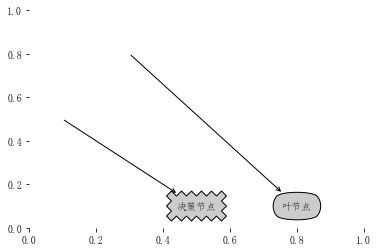

In [142]:
createPlot()

# 8.计算树的叶节点数目和树的层数

In [172]:
#获取叶节点的数目和树的层数
def getNumLeafs(myTree):#计算叶子节点的个数（不包括中间的分支节点）  
    numLeafs = 0
    firstStr = list(myTree.keys())[0]# 获得myTree的第一个键值，即第一个特征，分割的标签   
    #遇到的问题是mytree.keys()获得的类型是dict_keys，而dict_keys不支持索引，我的解决办法是把获得的dict_keys强制转化为list即可  
    secondDict = myTree[firstStr]# 根据键值得到对应的值，即根据第一个特征分类的结果   
    for key in secondDict.keys(): #获取第二个小字典中的key  
        if type(secondDict[key]).__name__=='dict':
            #判断是否小字典中是否还包含新的字典（即新的分支）   
            #书上写的是.-name-但是3.0以后得版本都应该写成.__name__(两个下划线) 重点！！！ 
            numLeafs += getNumLeafs(secondDict[key])
            #包含的话进行递归从而继续循环获得新的分支所包含的叶节点的数量  
        else:  numLeafs += 1#不包含的话就停止迭代并把现在的小字典加一表示这边有一个分支  
    return numLeafs

def getTreeDepth(myTree):##计算判断节点的个数  
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1+ getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth #间隔 间隔间隔得问题一定要多考虑啊啊啊啊啊啊  
    return maxDepth


# 9.成决策树图形

muytree: {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


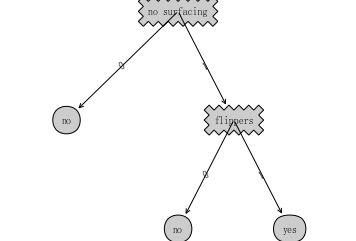

In [173]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

#def createPlot():
#    fig = plt.figure(1, facecolor='white')
#    fig.clf()
#    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
#    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

mytree = retrieveTree(0)
print('muytree:',mytree)
#getNumLeafs(mytree)
createPlot(mytree)


In [ ]:
预剪枝是指在决策树生成过程中，对每个结点在划分之前先进行估计，若当前结点的划分不能带来决策树泛化性能提升，则停止划分并将当前结点标记为叶节点
后剪枝则是从训练集生成一棵完整的决策树，然后自底向上地对非叶结点进行考察，若将该节点对应的子树替换为叶结点能带来决策树泛化能力提升，则将子树替换为叶结点
如何判断

In [176]:
a=(6/17)
b=(5/17)

In [178]:
IV = -(a*log(a,2)+a*log(a,2)+b*log(b,2))
IV

1.5798634010685344

In [175]:
IV = -(0.*log(0.5,2) + 0.5*log(0.5,2) + 0.4*log(0.4,2) + 0.6*log(0.6,2)) 
IV

1.9709505944546688

# 7.决策树的分类函数

In [113]:
#函数retrieveTree输出预先存储的树信息
#避免每次测试代码时都要从数据中创建树的麻烦
def retrieveTree(i):
    listOfTrees = [{'no surfacing':{0:'no',1:{'flippers':\
                                              {0:'no',1:'yes'}}}},
                   {'no surfacing':{0:'no',1:{'flippers':\
                    {0:{'head':{0:'no',1:'yes'}},1:'no'}}}}
                   ]
    return listOfTrees[i]

In [116]:
#函数retrieveTree输出预先存储的树信息
#避免每次测试代码时都要从数据中创建树的麻烦

def classify(inputTree, featLabels, testVec):
    classLabel = ''
    firstStr = list(inputTree.keys())[0] # 找到输入树当中键值[0]位置的值给firstStr#print('firstStr:', firstStr)
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel =secondDict[key]
    
    return classLabel

In [117]:
myDat,labels = createDataSet()
myTree = retrieveTree(0)
print('myTree:', myTree)

classlabel_1 = classify(mytree, labels, [1, 0])
print ('[1,0] is :', classlabel_1)
classlabel_2 = classify(mytree, labels, [1, 1])
print ('[1,1] is:', classlabel_2)

"""
ValueError: 'no surfacing' is not in list
主要原因是我先运行 mytree=createtree(data1,labels1)函数，
而createtree函数在运行过程中回删除标签中已经用过的值，所以导致之后labels不完整，解决方法是再新建一个即可。
"""

myTree: {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
firstStr: no surfing 
firstStr: flippers
[1,0] is : no
firstStr: no surfing 
firstStr: flippers
[1,1] is: yes


# 8.树的存储和读取

In [120]:
#生成决策树的存储
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)
"""
错误原因：pickle模块存储的是二进制字节码，需要以二进制的方式进行读写
1. 报错一：TypeError: write() argument must be str, not bytes
2. 报错二：UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

http://www.cnblogs.com/huiAlex/p/8855810.html
"""

In [121]:
storeTree(mytree, 'classifierstorage.txt')
print(grabTree('classifierstorage.txt')) 

{'no surfing ': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [ ]:
决策树学习基本算法

输入：训练集 D = {(x1,y1),(x2,y2)````(xm,ym)};
     属性集 A = {a1, a2,`````,ad}.
过程：函数TreeGenerate(D,A)
1.生产节点node；
2.if D中样本全属于同一类别C then
3.   将node标记为C类叶节点；return
4.end if
5.if A=null OR D中样本在A上取值相同 then
6.   将node标记为叶节点，其类别标记为D中样本数最多的类；then
7.end if
8.从A中选择最优划分属性a*；
9.for a*的每一个值av* do
10.   为node生成一个分之；令Dv表示D中在a*上取值为av*的样本子集
11.   if Dv为空 then
12.      将分支结点标记为叶结点，其类别标记为D中样本最多的类；return
13.   else
14.      以 TreeGenerate(Dv, A\{a*})为分支结点
15.   end if
16.end if
输出：以node为根结点的一棵决策树

In [1]:
from math import log

## 3-1 计算给定数据集的香农熵 P36

In [31]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet) # 列表元素个数
    labelCounts = {}# 创建了一个数据字典
    for featVec in dataSet:
        currentLabel = featVec[-1]#数据字典的键值是最后一列的数值
        if currentLabel not in labelCounts.keys(): #字典.keys() 输出所有键
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        #print(labelCounts)
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt
        #print(labelCounts[key],numEntries)
        #prob = float(labelCounts[key]) / numEntries
        #print(prob)

    
    
def createDataSet():
    dataSet  = [[1, 1, 'yes'],
                     [1, 1, 'yes'],
                     [1, 0, 'no'],
                     [0, 1, 'no'],
                     [0, 1, 'no']]

    labels = [ 'no surfcaing', 'flippers' ]
    return dataSet, labels

if __name__ == '__main__': #直接运行decision_tree,这个main函数会运行，如果是import decision_tree，main函数不运行
    myDat, labels = createDataSet()
    
    #myDat[0][-1] = 'maybe'
 
    
    print(myDat)
    #print(calcShannonEnt(myDat))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


## 3-2 按照给定特征划分数据集 P37

In [ ]:
分类算法需要测量信息熵，还需要划分数据集，度量划分数据集的熵，以便判断当前是否正确地划分了数据集
将对每个特征划分数据集的结果计算一次信息熵
然后判断按照哪个特征划分数据集是最好的划分方式

代码使用了三个输入参数：待划分的数据集、划分数据集的特征、需要返回的特征的值
因为该函数代码在同一数据集上被调用多次，为了不修改原始数据集，创建一个新的列表对象

数据集这个列表中的各个元素也是列表，要遍历数据集中的每个元素，一旦发现符合要求的值，则将其添加到新创建的列表中
在if语句中，程序将符合特征的数据抽取出来

In [38]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            #print("featVec[axis]",featVec[axis])
            reduceFeatVec = featVec[:axis]
            #print("reduceFeatVec",reduceFeatVec)
            reduceFeatVec.extend(featVec[axis+1:])
            #print("reduceFeatVec",reduceFeatVec)
            retDataSet.append(reduceFeatVec)
           #print(retDataSet)
    return retDataSet
#myDat 
#splitDataSet(myDat, 1, 0)
#print(splitDataSet(myDat, 1, 0))
#print(splitDataSet(myDat, 0, 1))

In [4]:
a = [1, 2, 3]
b = [4, 5, 6]
a.append(b)#列表得到了第四个元素，而且第四个元素也是一个list
a
a.extend(b)#得到了一个包含a 和 b 所有元素的列表
a

[1, 2, 3, [4, 5, 6], 4, 5, 6]

## 3-3 选择最好的数据集划分方式

In [5]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [32]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    #print(dataSet[0],len(dataSet[0]),numFeatures)  out：[1, 1, 'yes'] 3 2 
    bestEntropy = calcShannonEnt(dataSet)
    #print(bestEntropy)  out:0.9709505944546686
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        #print (i ) out: 0 1 
        featList = [example[i] for example in dataSet]
        """
        example[i] for example in dataSet,for example in dataSet是取行，myDat共有5行，
        example[0] for example in dataSet每次取每一行的【0】值，相当于取列"""
        #print(featList) #out:[1, 1, 1, 0, 0]  [1, 1, 0, 1, 1]
        uniqueVals = set(featList)
        #创建唯一的分类标签的列表   print(uniqueVals) out:{0, 1}{0, 1} 取出每个类别的属性值
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value )
            """
            print(subDataSet)
            
            [[1, 'no'], [1, 'no']]
            [[1, 'yes'], [1, 'yes'], [0, 'no']]
            
            [[1, 'no']]
            [[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]
            """
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
            """
            print(i,newEntropy)
            0 0.0
            0 0.5509775004326937
            
            1 0.0
            1 0.8
            """
        infoGain = bestEntropy - newEntropy
        """
        print(i,infoGain)
        
        0 0.4199730940219749
        1 0.17095059445466854"""
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i 
            #print(bestInfoGain)0.4199730940219749
    return bestFeature

#chooseBestFeatureToSplit(myDat)
#myDat

## 递归构建决策树

In [33]:
import operator

def majorityCnt(classList):
    classList = {}
    #创建classList中唯一值的数据字典，字典对象存储了classList中每个类标签出现的频率
    for vote in classList:
        if vote not in classCount.keys():classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),\
                              key = operator.itemgetter(1), reverse = True)
    #利用operator操作键值排序字典，并返回出现次数最多的分类名称
    return sortedClassCount[0][0]

## 3-4 创建树的函数代码 

In [51]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [90]:
from math import log

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt  = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob , 2)
    return shannonEnt

def createDataSet():
    dataSet  = [[1, 1, 'yes'],
                     [1, 1, 'yes'],
                     [1, 0, 'no'],
                     [0, 1, 'no'],
                     [0, 1, 'no']]

    labels = [ 'no surfcaing', 'flippers' ]
    return dataSet, labels
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    bestEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0;
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = bestEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature


import operator

def majorityCnt(classList):
    classList = {}
    for vote in classList:
        if vote not in classCount.keys():classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),\
                              key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{ }}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet\
                                                 (dataSet, bestFeat, value),subLabels)
    return myTree

import matplotlib.pyplot as plt
decisionNode = dict(boxstyle = 'sawtooth', fc = "0.8")
leafNode = dict(boxstyle ="round4", fc = "0.8")
arrow_args = dict(arrowstyle = "<-")
"""定义文本框和箭头格式"""
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,\
                           xycoords = 'axes fraction', \
                           xytext = centerPt, textcoords = 'axes fraction',\
                           va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode(U'决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode(U'叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

#得到叶子节点的数目
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    """
    会产生错误：TypeError: 'dict_keys' object does not support indexing
    这是由于python3改变了dict.keys,返回的是dict_keys对象,支持iterable 但不支持indexable，我们可以将其明确的转化成list：
    """
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#这里说的只是二叉树吧？？应该？
            numLeafs += getNumLeafs(secondDict[key])
        else:    numLeafs += 1
    return numLeafs
 
#树的层数
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':#一层只有一个dict
            thisDepth = 1 + getTreeDepth(secondDict[key])
            #print(123)
        else:
            thisDepth = 1
            #print(456)
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth


def retrieveTree(i):
    listOfTrees = [{'no surfcaing': {0: 'no', 1: {'flippers': \
                                                 {0: 'no', 1: 'yes'}}}},
                  {'no surfcaing': {0: 'no', 1: {'flippers': \
                                                 {0: {'head': {0:'no', 1: 'yes'}}, 1:'no'}}}}
                  ]
    return listOfTrees[i]


if __name__ == '__main__': #直接运行decision_tree,这个main函数会运行，如果是import decision_tree，main函数不运行
    myDat, labels = createDataSet()
    #print(myDat,labels)
    #print(calcShannonEnt(myDat))
    #myTree = createTree(myDat,labels)
    #myTree
    #createPlot()
    myTree = retrieveTree(0)
    print(getNumLeafs(myTree))
    print(getTreeDepth(myTree))   





3
2


In [82]:
mytree = retrieveTree(0)

In [87]:
list(mytree.keys())[0]

'no surfcaing'

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
tup = 4, 5, 6
tup

(4, 5, 6)

In [3]:
nested_tup = (4, 5, 6),(7, 8)
nested_tup

((4, 5, 6), (7, 8))

In [4]:
tuple([4, 0, 2])

(4, 0, 2)

In [6]:
tup = tuple("string")
tup

('s', 't', 'r', 'i', 'n', 'g')

In [9]:
tup = tuple(['foo', [1,2], True])
tup[2] = False

TypeError: 'tuple' object does not support item assignment

In [10]:
tup[1].append(3)
tup

('foo', [1, 2, 3], True)

In [11]:
(4, None, 'foo')+(6, 0)+('bar',)

(4, None, 'foo', 6, 0, 'bar')

In [13]:
tup = (4, 5, 6)
a, b, c = tup
b

5

In [15]:
tup = 4, 5, (6, 7)
a, b, (c, d) = tup
d

7

In [18]:
seq = [(1, 2, 3),(4, 5, 6),(7, 8, 9)]
for a, b, c in seq:
    pass
b

8

In [19]:
a = (1, 2, 2, 2, 2, 3, 4, 2)

In [20]:
a.count(2)

5

In [24]:
a_list = [2, 3, 7, None]
a_list

[2, 3, 7, None]

In [36]:
tup = ('foo', 'bar', 'baz')
b_list =list(tup)
b_list

['foo', 'bar', 'baz']

In [37]:
b_list[1] = 'peekaboo'
b_list

['foo', 'peekaboo', 'baz']

In [38]:
b_list.append('dwarf')
b_list

['foo', 'peekaboo', 'baz', 'dwarf']

In [39]:
b_list.insert(1, 'red')
b_list

['foo', 'red', 'peekaboo', 'baz', 'dwarf']

In [40]:
b_list.pop(2)

'peekaboo'

In [41]:
b_list

['foo', 'red', 'baz', 'dwarf']

In [42]:
b_list.append('foo')
b_list.remove('foo')
b_list

['red', 'baz', 'dwarf', 'foo']

In [43]:
'dwarf' in b_list

True

In [48]:
pd.DataFrame.apply??

In [49]:
pd.Series.map??